# Ракета
Найдем скорость ракеты с помощью закона сохранения импульса (пренебрегая силой тяжести):
$$p = p_r + p_g$$

$$mv = (m - dm)(v + dv) + dm(v - u)$$

$$dv = \frac{u * dm}{m - dm}$$

Спроецируем на оси:
$$dv_x = \frac{u * dm}{m - dm}*\frac{v_y}{v}$$

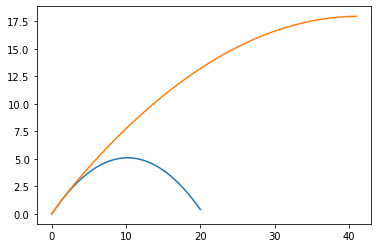

In [1]:
import math
import numpy as np
from matplotlib import pyplot as pp

MODEL_G = 9.81
MODEL_DT = 0.001
MODEL_DM = 0.1
MODEL_U = 30

class Body:
    def __init__(self, x, y, vx, vy):

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        
    def advance(self):

        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

class Rocket(Body):
    def __init__(self, x, y, vx, vy):

        super().__init__(x, y, 10, 10)
        self.m = 100

    def advance(self):
        
        super().advance()
        
        if self.m >= 60:
            self.m -= MODEL_DM
            v = (self.vx **2 + self.vy **2) **0.5
            dv = MODEL_U * MODEL_DM / self.m
            self.vx += dv * self.vx / v
            self.vy += dv * self.vy / v

b = Body(0, 0, 10, 10)
r = Rocket(0, 0, 0, 0)

bodies = [b, r]

for t in np.r_[0:2:MODEL_DT]:
    for b in bodies:
        b.advance()

for b in bodies:
    pp.plot(b.trajectory_x, b.trajectory_y)
pp.show()